## Описание работы:     

   Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.

   Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.

   Предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.

## 1. Описание данных

 customerID – id клиента  
 gender – пол клиента (male/female)  
 SeniorCitizen – яляется ли клиент пенсионером (1, 0)  
 Partner – состоит ли клиент в браке (Yes, No)  
 Dependents – есть ли у клиента иждивенцы (Yes, No)  
 tenure – сколько месяцев человек являлся клиентом компании  
 PhoneService – подключена ли услуга телефонной связи (Yes, No)  
 MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)  
 InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)  
 OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)  
 OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)  
 DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)  
 TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)  
 StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)  
 StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)  
 Contract – тип контракта клиента (Month-to-month, One year, Two year)  
 PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)  
 PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
 MonthlyCharges – месячный размер оплаты на настоящий момент  
 TotalCharges – общая сумма, которую клиент заплатил за услуги за все время  
 Churn – произошел ли отток (Yes or No)  

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (15, 10)})
%matplotlib inline


In [376]:
data = pd.read_csv('telecom_users.csv')
y = data['Churn']
X = data.drop(['Churn', 'Unnamed: 0'], axis=1) 

title_mapping = {"No": 0, "Yes": 1} # Мэппинг зависимой переменной
y = y.map(title_mapping).astype(int)


In [377]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5


In [378]:
print('Количество записей: {}, количество уникальных пользователей: {}'\

      .format(X.groupby('customerID').agg({'customerID':'nunique'}).count()[0],X.shape[0]))

Количество записей: 5986, количество уникальных пользователей: 5986


In [379]:
X.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

 Можно заменить пропуски на 0 - этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее или медианное значение признака.

In [380]:
X.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [381]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], downcast='float', errors='coerce') # Конвертация общей суммы в целый тип
X.isnull().sum() # Проверка ошибки конвертации - 10 значений 

Total_charges_median = X.query('TotalCharges >= 0')['TotalCharges'].median() # Медианное значение для замены ошибочных значений
X['TotalCharges'].fillna(Total_charges_median, inplace=True)

dataframe = pd.concat([X, y], axis=1)


In [382]:
features = X.columns.to_list()
features.remove('customerID')

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features = [i for i in features if i not in numeric_features]
        

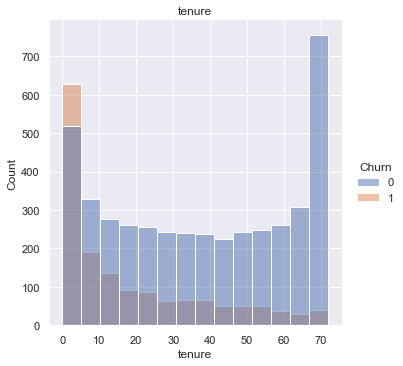

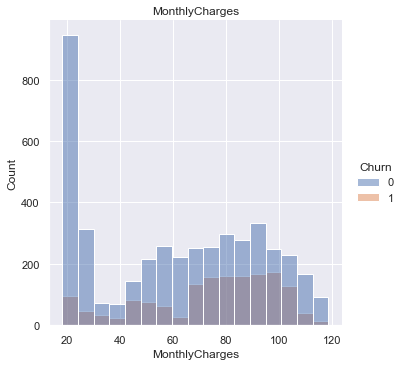

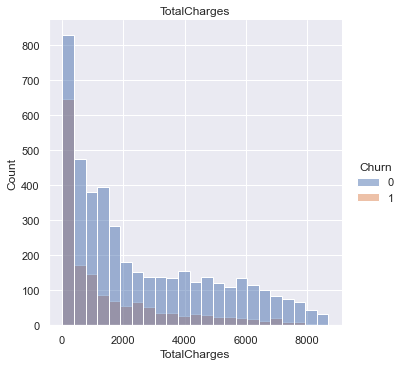

In [383]:
for i, feature in enumerate(numeric_features):
    sns.displot(data=dataframe[[feature, 'Churn']], x=feature, hue='Churn')
    plt.title(feature)
plt.show()

In [384]:
X[numeric_features].describe().round(2) # Основные статистики для числовых признаков:


,tenure,MonthlyCharges,TotalCharges
count,5986.00,5986.00,5986.00
mean,32.47,64.80,2296.58
std,24.52,30.11,2272.51
min,0.00,18.25,18.80
25%,9.00,35.65,406.27
50%,29.00,70.40,1412.15
75%,56.00,89.90,3841.50
max,72.00,118.75,8684.80


###### Доля классов отток / не отток

In [385]:
y.value_counts() # Несбалансированный датасет - неравные классы - метрика accuracy бесполезна

0    4399
1    1587
Name: Churn, dtype: int64

Несбалансированный датасет - неравные классы - метрика accuracy бесполезна.

В рамках задачи оттока нам важнее найти клиентов, которые собираются от нас уйти, чем найти клиентов, которые от нас уходить не собираются. Поэтому если мы ошибочно отнесем клиента, который уходить не собирается, к оттоку, это не так страшно, как если мы пропустим клиента, который от нас уходить собирается, потому что в этом случае мы, конечно же, не сможем его удержать.

Другими словами нам нестрашно сделать ложное срабатывание (FP), т.е. стоит обратить внимание на метрику gолнота (recall) (нужно меньше ложных пропусков (FN)) + Roc-Auc как метрику, которая учитывает и полноту, и точность (precision).

Часто целевой класс может составлять единицы или даже десятые доли процентов от всей выборки. Такая несбалансированность классов может негативно сказаться на модели классификации. Во-первых, может не хватить данных для обучения, данных для настройки на целевой класс. Это может привести к тому, что объекты не будут классифицироваться к этому классу, потому что, скажем, с точки зрения модели это может быть очень рискованно. Часто подобные проблемы возникают на практике. Нам с вами очень важно заметить это в процессе обучения модели, важно заметить это на метриках, то есть важно выбирать такие метрики, которые к этому чувствительны, и решать эту проблему в процессе построения модели. 

###### Корреляции признаков с целевой переменной

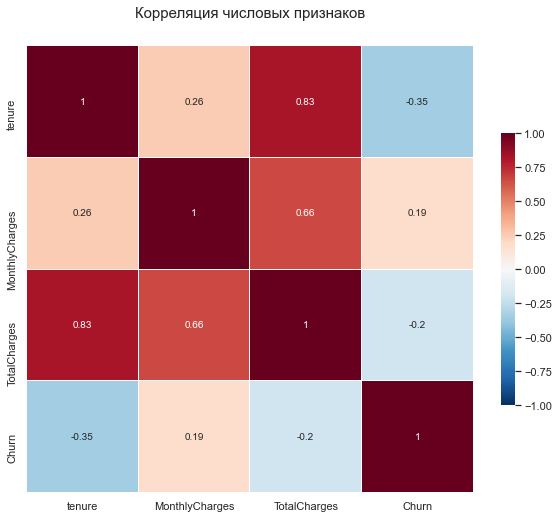

In [386]:
# Числовые признаки

num_churn = numeric_features + ['Churn']

colormap = plt.cm.RdBu.reversed()
plt.figure(figsize=(10,10))
plt.title('Корреляция числовых признаков', y=1.05, size=15)
sns.heatmap(dataframe[num_churn].corr(),linewidths=0.1,vmin=-1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, cbar_kws={"shrink": 0.5})
plt.show()

Сильная корреляция между TotalCharges и MonthlyCharges (т.к. MonthlyCharges = TotalCharges / tenure), скорее всего, следует исключить один из коррелирующих признаков при обучении модели.

In [387]:
# Используем коэффициент V Крамера и матрицу сопряженности для иследования корреляции категориальных признаков

cat_churn = categorical_features + ['Churn']

def cramers_V(confusion_matrix):
    cm = confusion_matrix.values
    chi2 = ss.chi2_contingency(cm, correction=True)[0]
    p_value = ss.chi2_contingency(cm)[1]
    n = cm.sum()
    return [np.sqrt(chi2 / (n*(min(cm.shape)-1))), p_value]



category_corrs = []
for feature1 in categorical_features:
    conf_matr = dataframe[[feature1, 'Churn', 'customerID']].groupby([feature1, 'Churn'], as_index=False).count() \
                .pivot(index=feature1, columns='Churn', values='customerID')
    p_value = cramers_V(conf_matr)[1]
    if p_value > 0:
            category_corrs.append((feature1, cramers_V(conf_matr)[0]))
category_corrs = pd.DataFrame(category_corrs)
category_corrs.columns = ['feature1', 'corr_churn']


category_corrs.sort_values(by='corr_churn', ascending=False)

,feature1,corr_churn
13,Contract,0.409374
7,OnlineSecurity,0.345812
10,TechSupport,0.336577
6,InternetService,0.315592
15,PaymentMethod,0.298356
8,OnlineBackup,0.288908
9,DeviceProtection,0.279510
12,StreamingMovies,0.227184
11,StreamingTV,0.226700
14,PaperlessBilling,0.188612


###### Мэппинг категориальных признаков для обучения модели

In [388]:
cat_feat_map = pd.DataFrame(columns=['DistVal', 'Feature'])

for cat_feat in categorical_features:
    cat_feat_map = cat_feat_map.append({'DistVal': X[cat_feat].nunique(), 'Feature': cat_feat}, ignore_index=True)
    
cat_feat_map.tail()

,DistVal,Feature
11,3,StreamingTV
12,3,StreamingMovies
13,3,Contract
14,2,PaperlessBilling
15,4,PaymentMethod


In [389]:
# Для мэппинга признаков с двумя возможными значениями - маркируем Yes - 1, No - 0 (кроме пола)

# Для признаков с большим количеством значений - one-hot encoding

cat_feat_to_map = list(cat_feat_map.query('DistVal <= 2').Feature.values)
cat_feat_to_map.remove('gender')
cat_feat_to_map.remove('SeniorCitizen')
cat_feat_one_hot = list(cat_feat_map.query('DistVal > 2').Feature.values)

In [390]:
dataframe_ml = dataframe.drop(['customerID'], axis=1)

for feature in cat_feat_to_map:
    dataframe_ml[feature] = dataframe_ml[feature].map({'Yes': 1, 'No': 0})
 

In [391]:
dataframe_ml = pd.get_dummies(dataframe_ml, columns=cat_feat_one_hot + ['gender'])

dataframe_ml.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,0,1,1,72,1,0,24.10,1734.650024,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,44,1,1,88.15,3973.199951,0,1,...,0,1,0,0,0,1,0,0,1,0
2,1,1,0,38,1,1,74.95,2869.850098,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,4,1,1,55.90,238.500000,0,1,...,1,1,0,0,0,0,1,0,0,1
4,0,0,0,2,1,0,53.45,119.500000,0,1,...,0,1,0,0,0,0,1,0,0,1


## 2. Исследование зависимостей и формулирование гипотез

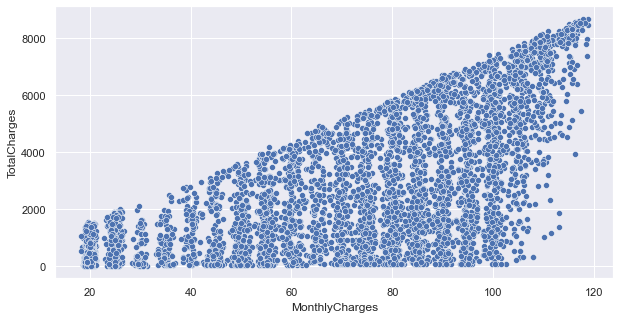

In [392]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=dataframe[['MonthlyCharges', 'TotalCharges']], x='MonthlyCharges', y='TotalCharges')
plt.show()

Наблюдается сильная корреляция (но с большим разбросом), вероятно, стоит исключить один из рассматриваемых признаков для обучения.

In [393]:
dataframe[['gender', 'Churn']].groupby('gender').mean()

,Churn
gender,
Female,0.269414
Male,0.260984


In [394]:
dataframe[['PaymentMethod', 'Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.171254
Credit card (automatic),0.151957
Electronic check,0.449651
Mailed check,0.192111


In [395]:
dataframe[['Partner', 'Dependents', 'Churn']].groupby(['Partner', 'Dependents']).mean()

Churn
Partner Dependents          
No      No          0.340541
        Yes         0.214984
Yes     No          0.254225
        Yes         0.144879

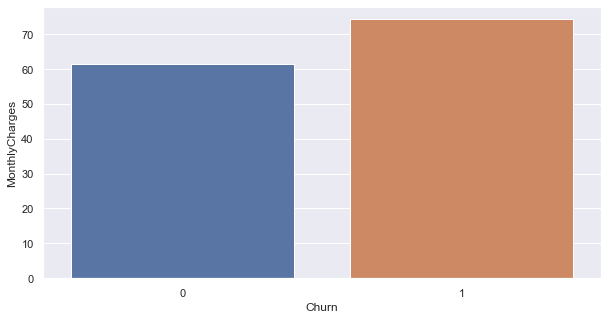

In [396]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dataframe[['MonthlyCharges', 'Churn']].groupby('Churn', as_index=False).mean(), x='Churn', y='MonthlyCharges')
plt.show()

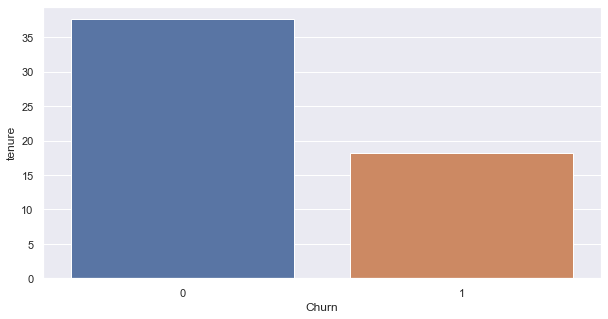

In [397]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dataframe[['tenure', 'Churn']].groupby('Churn', as_index=False).mean(), x='Churn', y='tenure')
plt.show()

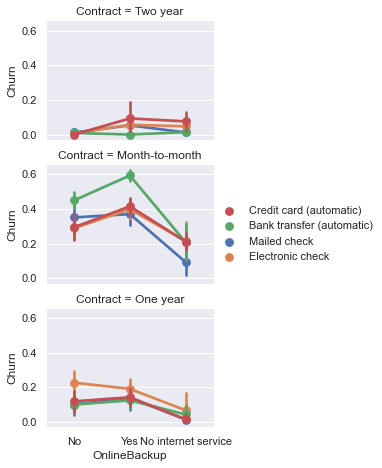

In [398]:
grid = sns.FacetGrid(dataframe, row='Contract', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'OnlineBackup', 'Churn', 'PaymentMethod', palette='deep')
grid.add_legend()
plt.show()

##### Выводы:  
- Следует исключить один из признаков - MonthlyCharges или TotalCharges
- Средний отток не зависит от пола человека на имеющихся данных
- Пользователи, оплачивающие услуги методом Electronic check - имеют наибольший отток
- Семьянины меньше подвержены оттоку
- Средний показатель MonthlyCharges не отражает склонность к оттоку, в отличие от количества месяцев жизни клиента
- Построена зависимость тип контракта - метод оплаты - наличие услуги поддержки


## 3. Построение моделей для прогнозирования оттока

##### Baseline-решение

Логистическая регрессия - один из наиболее распространенных методов для бинарной классификации.

In [399]:
def log_clf(X_tr, y_tr, X_ts, y_ts):
    
    logreg = LogisticRegression(random_state=42) 
    logreg_model = logreg.fit(X_tr, y_tr)
    lr_predictions = logreg.predict(X_ts)
    lr_recall = recall_score(y_ts, lr_predictions)
    lr_roc_auc = roc_auc_score(y_ts, lr_predictions)
    return lr_recall, lr_recall

C-Support Vector Classification - применим для небольших объемов данных, чувствителен к выбросам.

In [400]:
def svc_clf(X_tr, y_tr, X_ts, y_ts):

    svc = SVC(random_state=42)
    svc_model = svc.fit(X_tr, y_tr)
    svc_predictions = svc.predict(X_ts)
    svc_recall = recall_score(y_ts, svc_predictions)
    svc_roc_auc = roc_auc_score(y_ts, svc_predictions)
    return svc_recall, svc_roc_auc

KNN - устойчив к выбросам, модифицируется под задачу, применим к небольшым объемам данных.

In [401]:
def knn_clf(X_tr, y_tr, X_ts, y_ts):

    knn = KNeighborsClassifier()
    knn_model = knn.fit(X_tr, y_tr)
    knn_predictions = knn.predict(X_ts)
    knn_recall = recall_score(y_ts, knn_predictions)
    knn_roc_auc = roc_auc_score(y_ts, knn_predictions)
    return knn_recall, knn_roc_auc

Naive Bayes - быстро выполняется, много категориальных признаков - алгоритм лучше работает, чувствителен к коррелирующим признакам.

In [402]:
def gnb_clf(X_tr, y_tr, X_ts, y_ts):

    gaussian = GaussianNB()
    gauss_model = gaussian.fit(X_tr, y_tr)
    gauss_predictions = gaussian.predict(X_ts)
    gauss_recall = recall_score(y_ts, gauss_predictions)
    gauss_roc_auc = roc_auc_score(y_ts, gauss_predictions)
    return gauss_recall, gauss_roc_auc

Градиентный бустинг - универсальный алгоритм, не очень требователен к данным, восстанавливает нелинейные зависимости, и хорошо работает на больших наборах данных.

In [403]:
def gn_clf(X_tr, y_tr, X_ts, y_ts):

    gbc = GradientBoostingClassifier(random_state=42)
    gbc_model = gbc.fit(X_tr, y_tr)
    gbc_predictions = gbc.predict(X_ts)
    gbc_recall = recall_score(y_ts, gbc_predictions)
    gbc_roc_auc = roc_auc_score(y_ts, gbc_predictions)
    return gbc_recall, gbc_roc_auc

 Random Forest - устойчив к машстабу признаков, допускает разнотипные данные, не бывает отказов от классификации

In [404]:
def rf_clf(X_tr, y_tr, X_ts, y_ts):

    random_forest = RandomForestClassifier(random_state=42)
    rfc_model = random_forest.fit(X_tr, y_tr)
    rfc_predictions = random_forest.predict(X_ts)
    rfc_recall = recall_score(y_ts, rfc_predictions)
    rfc_roc_auc = roc_auc_score(y_ts, rfc_predictions)
    return rfc_recall, rfc_roc_auc

## 4. Сравнение качества моделей

In [405]:
def modeling(X_train, y_train, X_test, y_test):

    lr_roc_auc, lr_recall = log_clf(X_train, y_train, X_test, y_test)
    svc_roc_auc, svc_recall = svc_clf(X_train, y_train, X_test, y_test)
    knn_roc_auc, knn_recall = knn_clf(X_train, y_train, X_test, y_test)
    gauss_roc_auc, gauss_recall = gnb_clf(X_train, y_train, X_test, y_test)
    gbc_roc_auc, gbc_recall = gn_clf(X_train, y_train, X_test, y_test)
    rfc_roc_auc, rfc_recall = rf_clf(X_train, y_train, X_test, y_test)

    models = pd.DataFrame({
        'Model': ['Logistic Regression', 'C-Support Vector Classification', 'K-nearest neighbors', 'Gaussian Naive Bayes', 
                  'Gradient Boosting', 'Random Forest'],
        'Roc-Auc' : [lr_roc_auc, svc_roc_auc, knn_roc_auc, gauss_roc_auc, gbc_roc_auc, rfc_roc_auc],
        'Recall': [lr_recall, svc_recall, knn_recall, gauss_recall, gbc_recall, rfc_recall]})

    return models.sort_values(by=['Roc-Auc', 'Recall'], ascending=False)


In [406]:
independent = dataframe_ml.drop(['Churn'], axis=1) 
target = dataframe_ml['Churn']

X, X_valid, y, y_valid = train_test_split(independent, target, test_size=0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

modeling(X_train, y_train, X_test, y_test)

,Model,Roc-Auc,Recall
3,Gaussian Naive Bayes,0.829912,0.734505
4,Gradient Boosting,0.519062,0.714955
0,Logistic Regression,0.510264,0.510264
2,K-nearest neighbors,0.472141,0.674309
5,Random Forest,0.466276,0.692322
1,C-Support Vector Classification,0.000000,0.500000


## 5. Эксперименты с моделью

Попробуем исключить один из коррелирущих числовых признаков - TotalCharges или MonthlyCharges.

In [407]:
independent = dataframe_ml.drop(['Churn', 'TotalCharges'], axis=1) 
target = dataframe_ml['Churn']

X, X_valid, y, y_valid = train_test_split(independent, target, test_size=0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

modeling(X_train, y_train, X_test, y_test)

,Model,Roc-Auc,Recall
3,Gaussian Naive Bayes,0.838710,0.737293
0,Logistic Regression,0.533724,0.533724
2,K-nearest neighbors,0.516129,0.697377
4,Gradient Boosting,0.513196,0.713097
5,Random Forest,0.448680,0.678153
1,C-Support Vector Classification,0.395894,0.665724


In [408]:
independent = dataframe_ml.drop(['Churn', 'MonthlyCharges'], axis=1) 
target = dataframe_ml['Churn']

X, X_valid, y, y_valid = train_test_split(independent, target, test_size=0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

modeling(X_train, y_train, X_test, y_test)

,Model,Roc-Auc,Recall
3,Gaussian Naive Bayes,0.832845,0.738656
4,Gradient Boosting,0.530792,0.721357
0,Logistic Regression,0.513196,0.513196
5,Random Forest,0.454545,0.680549
2,K-nearest neighbors,0.425220,0.640644
1,C-Support Vector Classification,0.000000,0.500000


Используем техники оверсемплинга: SMOTE и ADASYN.

In [409]:
independent = dataframe_ml.drop(['Churn'], axis=1) 
target = dataframe_ml['Churn']

X, X_valid, y, y_valid = train_test_split(independent, target, test_size=0.15, random_state=42)

X_smote, y_smote = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

modeling(X_train, y_train, X_test, y_test)

,Model,Roc-Auc,Recall
3,Gaussian Naive Bayes,0.879334,0.795698
4,Gradient Boosting,0.847434,0.849139
0,Logistic Regression,0.847434,0.847434
5,Random Forest,0.843273,0.861974
2,K-nearest neighbors,0.773925,0.752073
1,C-Support Vector Classification,0.547850,0.623471


In [410]:
independent = dataframe_ml.drop(['Churn'], axis=1) 
target = dataframe_ml['Churn']

X, X_valid, y, y_valid = train_test_split(independent, target, test_size=0.15, random_state=42)

X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

modeling(X_train, y_train, X_test, y_test)

,Model,Roc-Auc,Recall
3,Gaussian Naive Bayes,0.874181,0.782170
4,Gradient Boosting,0.863696,0.852726
5,Random Forest,0.845347,0.858844
0,Logistic Regression,0.845347,0.845347
2,K-nearest neighbors,0.825688,0.733323
1,C-Support Vector Classification,0.463958,0.589027


Исключим TotalCharges и используем SMOTE.

In [411]:
independent = dataframe_ml.drop(['Churn', 'TotalCharges'], axis=1) 
target = dataframe_ml['Churn']

X, X_valid, y, y_valid = train_test_split(independent, target, test_size=0.15, random_state=42)

X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

modeling(X_train, y_train, X_test, y_test)

,Model,Roc-Auc,Recall
2,K-nearest neighbors,0.952639,0.812091
3,Gaussian Naive Bayes,0.859269,0.770725
4,Gradient Boosting,0.857916,0.844517
5,Random Forest,0.847091,0.859051
0,Logistic Regression,0.836265,0.836265
1,C-Support Vector Classification,0.803789,0.735006


In [412]:
gbc_predictions = gbc.predict(X_valid)
gbc_recall = recall_score(y_valid, gbc_predictions)
gbc_roc_auc = roc_auc_score(y_valid, gbc_predictions)

print('Roc-Auc на валидации для GBC: {:.3f}, recall: {:.3f}'.format(gbc_roc_auc, gbc_recall))

Roc-Auc на валидации для GBC: 0.739, recall: 0.640


In [413]:
# Попробуем произвести настройку параметров через кросс-валидацию и грид-серч

independent = dataframe_ml.drop(['Churn', 'TotalCharges'], axis=1) 
target = dataframe_ml['Churn']

X, X_valid, y, y_valid = train_test_split(independent, target, test_size=0.15, random_state=42)

X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)



skf = StratifiedKFold(n_splits=5, random_state=42)
gbc_params = {'learning_rate': [0.01, 0.1, 1, 10, 100], 'n_estimators': [10, 50, 100], 
              'max_depth': range(5, 10)}
gbc_grid = GridSearchCV(gbc, gbc_params, cv=skf)
gbc_grid1 = gbc_grid.fit(X_train, y_train)
gbc_grid1.best_params_


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}

In [436]:
# Используем полученные параметры на модели

gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=6, n_estimators=53, random_state=42)
gbc_model = gbc.fit(X_train, y_train)
gbc_predictions = gbc.predict(X_valid)
gbc_recall = recall_score(y_valid, gbc_predictions)
gbc_roc_auc = roc_auc_score(y_valid, gbc_predictions)

print('Roc-Auc на валидации для GBC: {:.3f}, recall: {:.3f}'.format(gbc_roc_auc, gbc_recall))

Roc-Auc на валидации для GBC: 0.754, recall: 0.662


## Общие выводы работы:


По совокупности рассмотренных моделей, их метрик качества и оптимизаций - выбирается модель, построенная **градиентным бустингом** (максимально полученный скор на валидации - **0.75**, что неплохо для первичного построения), дальнейшие исследования возможны с методами кодирования категориальных признаков, тестирования комбинаций признаков, точная настройка параметров выбранного алгоритма.